### Import required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st
from scipy.stats import norm
import scipy.stats as stats
import statsmodels.api as sm

### Read data file

In [2]:
# Data Source : https://www.kaggle.com/datasets/oktayrdeki/heart-disease

df = pd.read_csv ('heart_disease.csv')
# Display first few rows
print(df.columns)

Index(['Age', 'Gender', 'Blood Pressure', 'Cholesterol Level',
       'Exercise Habits', 'Smoking', 'Family Heart Disease', 'Diabetes', 'BMI',
       'High Blood Pressure', 'Low HDL Cholesterol', 'High LDL Cholesterol',
       'Alcohol Consumption', 'Stress Level', 'Sleep Hours',
       'Sugar Consumption', 'Triglyceride Level', 'Fasting Blood Sugar',
       'CRP Level', 'Homocysteine Level', 'Heart Disease Status'],
      dtype='object')


### Variable Selection

Selecting following Quantitative variables for my Analysis

- Age – Older individuals generally have a higher risk of heart disease.
- Blood Pressure – High blood pressure (hypertension) is a major risk factor for heart attacks.
- Cholesterol Level – Elevated cholesterol, especially high LDL and low HDL levels, increases heart disease risk.
- Triglyceride Level – High triglyceride levels are linked to a greater likelihood of heart disease.
- BMI (Body Mass Index) – Obesity or an unhealthy BMI is a significant risk factor for cardiovascular disease.

### Historgram and Outliers

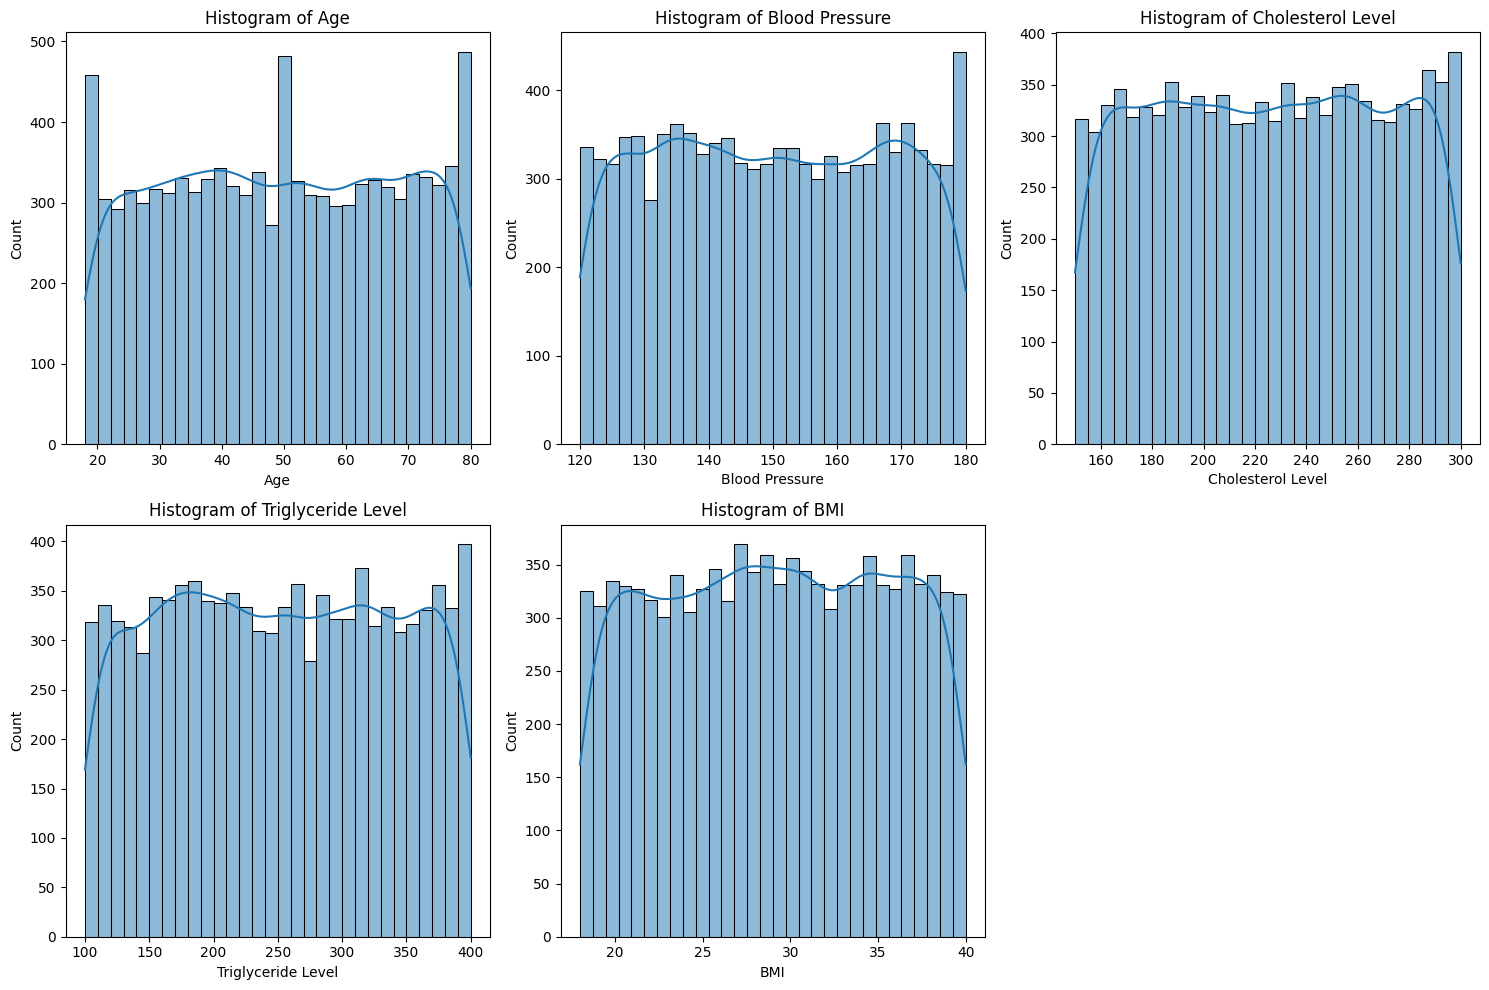

In [3]:
# Selected quantitative variables
quantitative_vars = ['Age', 'Blood Pressure', 'Cholesterol Level', 'Triglyceride Level', 'BMI']

# Generate histograms
plt.figure(figsize=(15, 10))
for i, col in enumerate(quantitative_vars, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Histogram of {col}')
    
plt.tight_layout()
plt.show()

#### Findings

- No severe skewness is apparent, suggesting relatively normal distributions.
- The presence of peaks at specific points (especially in Age) might indicate grouping effects.
- Potential outliers exist in blood pressure, cholesterol, and BMI, requiring further analysis.

#### Histogram Interpretation

- Age: The distribution appears fairly uniform, but there are peaks at certain ages, likely due to binning effects or specific data collection patterns. The presence of extreme values at both ends (younger and older individuals) should be examined for potential outliers.

- Blood Pressure: The distribution spans a wide range, with higher density around the middle values. The rightmost values may indicate potential outliers, representing individuals with extremely high blood pressure.

- Cholesterol Level: The data is relatively spread out, with a consistent distribution across different levels. However, extremely high cholesterol values should be reviewed to assess their impact on analysis.

- Triglyceride Level: This variable also has a spread-out distribution. Any significant peaks at the higher end could indicate potential high-risk individuals.

- BMI: The data appears evenly distributed, but it is essential to investigate extremely high BMI values, which could indicate outliers or potential errors.


### Descriptive Characteristics

In [4]:
# Descriptive statistics
for var in quantitative_vars:
    mean_val = df[var].mean()
    mode_val = st.mode(df[var])
    spread = df[var].max() - df[var].min()
    skewness = df[var].skew()

    print(f"{var}:")
    print(f"  Mean: {mean_val:.4f}")
    print(f"  Mode: {mode_val:.4f}")
    print(f"  Spread (Range): {spread}")
    print(f"  Skewness (Tail Direction): {'Right-Skewed' if skewness > 0 else 'Left-Skewed' if skewness < 0 else 'Symmetric'}\n")

Age:
  Mean: 49.2963
  Mode: 71.0000
  Spread (Range): 62.0
  Skewness (Tail Direction): Left-Skewed

Blood Pressure:
  Mean: 149.7577
  Mode: 134.0000
  Spread (Range): 60.0
  Skewness (Tail Direction): Right-Skewed

Cholesterol Level:
  Mean: 225.4256
  Mode: 292.0000
  Spread (Range): 150.0
  Skewness (Tail Direction): Left-Skewed

Triglyceride Level:
  Mean: 250.7344
  Mode: 307.0000
  Spread (Range): 300.0
  Skewness (Tail Direction): Right-Skewed

BMI:
  Mean: 29.0773
  Mode: 24.9916
  Spread (Range): 21.99411685290619
  Skewness (Tail Direction): Left-Skewed



#### Findings

1. Age
- Mean (49.3 years): The average age of individuals in the dataset is around 49 years.
- Mode (71 years): The most frequently occurring age is 71, indicating that a significant number of individuals in the dataset are older.
- Spread (62 years): The age range is quite large (from youngest to oldest).
- Skewness (Left-Skewed): More data points are concentrated toward older ages, suggesting a higher number of older individuals in the dataset.

2. Blood Pressure
- Mean (149.76 mmHg): The average blood pressure is relatively high, possibly indicating that many individuals in the dataset have hypertension.
- Mode (134 mmHg): The most common blood pressure value is 134 mmHg, which is in the prehypertension range.
- Spread (60 mmHg): There is a considerable range of blood pressure values.
- Skewness (Right-Skewed): There are extreme high values, suggesting some individuals have significantly higher blood pressure levels.

3. Cholesterol Level
- Mean (225.43 mg/dL): The average cholesterol level is above 200 mg/dL, indicating that many individuals may have elevated cholesterol levels.
- Mode (292 mg/dL): The most frequently occurring value is high, which suggests a significant number of people have high cholesterol.
- Spread (150 mg/dL): Cholesterol values vary significantly.
- Skewness (Left-Skewed): More individuals have lower cholesterol levels, but some still have extremely high values.

4. Triglyceride Level
- Mean (250.73 mg/dL): The average triglyceride level is quite high, as normal levels are typically below 150 mg/dL.
- Mode (307 mg/dL): A significant number of people have high triglyceride levels.
- Spread (300 mg/dL): There is a large variation in triglyceride levels.
- Skewness (Right-Skewed): Some individuals have extremely high triglyceride levels, pulling the distribution toward the right.

5. BMI (Body Mass Index)
- Mean (29.08): The average BMI is close to the threshold of obesity (≥30), suggesting a generally overweight population.
- Mode (24.99): The most frequent BMI is around 25, which is on the edge of the normal weight category.
- Spread (21.99): The range is relatively broad, indicating a mix of underweight, normal, overweight, and obese individuals.
- Skewness (Left-Skewed): A higher concentration of individuals have a BMI in the overweight and obese range, with fewer individuals on the lower end.

### Scenario Comparision using PMF

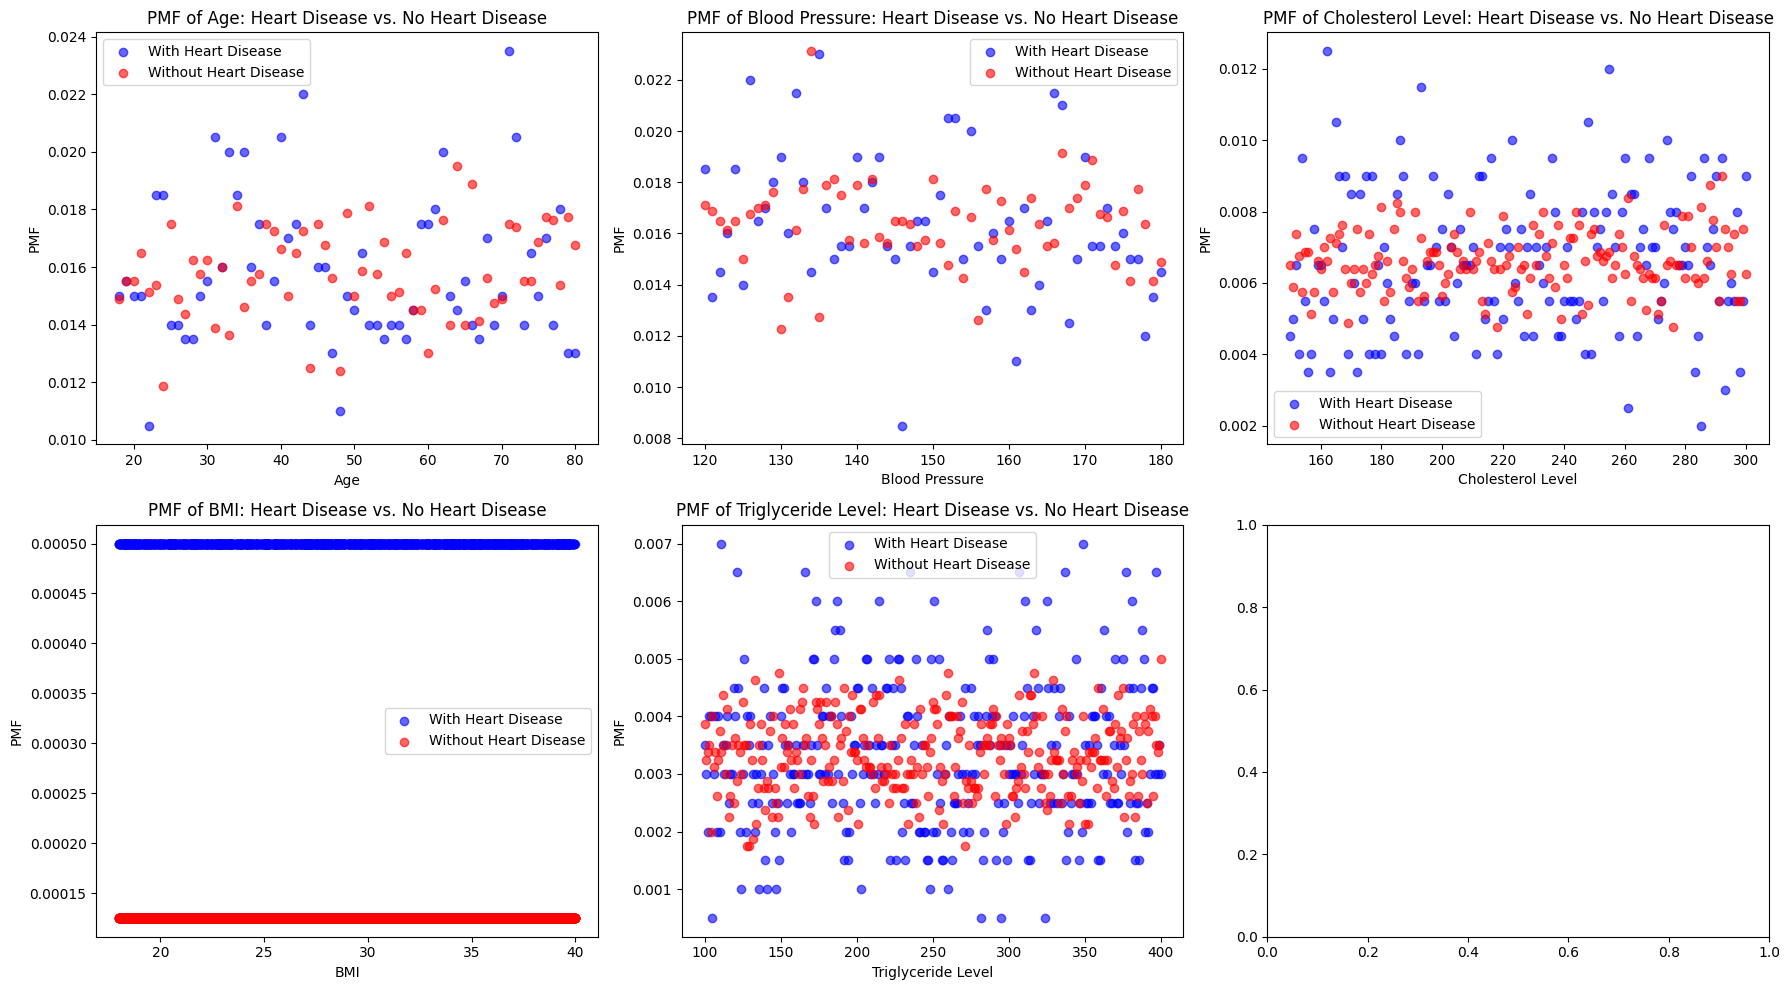

In [5]:
# Define the two groups (with and without heart disease)
group_1 = df[df['Heart Disease Status'] == 'Yes']
group_2 = df[df['Heart Disease Status'] == 'No']

# Function to compute PMF
def compute_pmf(data):
    values, counts = np.unique(data, return_counts=True)
    pmf = counts / counts.sum()
    return values, pmf

# List of variables to analyze
variables = ['Age', 'Blood Pressure', 'Cholesterol Level', 'BMI', 'Triglyceride Level']
colors = ['blue', 'red']
labels = ['With Heart Disease', 'Without Heart Disease']

# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for i, var in enumerate(variables):
    values_1, pmf_1 = compute_pmf(group_1[var])
    values_2, pmf_2 = compute_pmf(group_2[var])
    
    axes[i].scatter(values_1, pmf_1, color=colors[0], alpha=0.6, label=labels[0])
    axes[i].scatter(values_2, pmf_2, color=colors[1], alpha=0.6, label=labels[1])
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('PMF')
    axes[i].set_title(f'PMF of {var}: Heart Disease vs. No Heart Disease')
    axes[i].legend()

# Adjust layout
plt.tight_layout()
plt.show()



#### Findings
1. Age vs. PMF
    - Observation: The distribution of age appears similar for both groups.
    - Insight: There is no clear distinction in PMF, meaning age alone might not be a strong predictor of heart disease.

2. Blood Pressure vs. PMF
    - Observation: The PMFs for both groups are scattered, with no clear trend.
    - Insight: While blood pressure might influence heart disease risk, the distribution here suggests it is not a singular determining factor.

3. Cholesterol Level vs. PMF
    - Observation: There is some overlap, but individuals with heart disease (blue points) may have slightly higher cholesterol levels.
    - Insight: Cholesterol might play a role in heart disease, but further statistical analysis (e.g., hypothesis testing) is needed to confirm significance.

4. BMI vs. PMF
    - Observation: The PMFs for both groups are positioned at two distinct levels.
    - Insight: This suggests that BMI distribution differs significantly between individuals with and without heart disease. This variable may have a stronger relationship with heart disease.

5. Triglyceride Level vs. PMF
    - Observation: The PMFs for both groups appear dispersed, with some overlap.
    - Insight: Triglyceride levels could be a contributing factor but might not be a definitive predictor.

### CDF

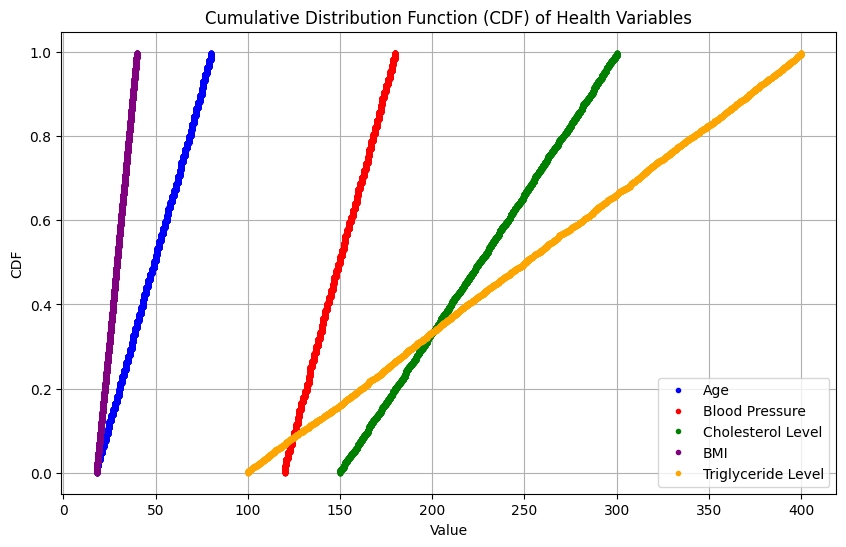

In [6]:
# Define variables to plot
variables = ['Age', 'Blood Pressure', 'Cholesterol Level', 'BMI', 'Triglyceride Level']
colors = ['blue', 'red', 'green', 'purple', 'orange']

plt.figure(figsize=(10, 6))

# Compute and plot CDF for each variable
for var, color in zip(variables, colors):
    data = df[var].sort_values()
    cdf = np.arange(1, len(data) + 1) / len(data)
    plt.plot(data, cdf, marker='.', linestyle='none', color=color, label=var)

# Customize plot
plt.xlabel('Value')
plt.ylabel('CDF')
plt.title('Cumulative Distribution Function (CDF) of Health Variables')
plt.legend()
plt.grid()
plt.show()

#### Findings

1. Steeper curves (Age, BMI, Blood Pressure - Blue, Purple, and Red)
    - The steepness indicates that the values are concentrated within a narrow range.
    - For instance, BMI and Age have a sharp rise, suggesting that most individuals have similar values for these variables.

2. More gradual curves (Triglyceride Level, Cholesterol Level - Orange, Green)
    - A gradual slope means a wider spread of values across individuals.
    - Triglyceride Level (orange) and Cholesterol Level (green) have a smoother, more gradual incline, suggesting greater variability in the dataset.

3. Order of Variables
    - Age and BMI values are relatively lower compared to other variables, as seen on the x-axis.
    - Cholesterol and Triglyceride Levels extend to higher values, indicating a broader range.

### Analytical Distribution

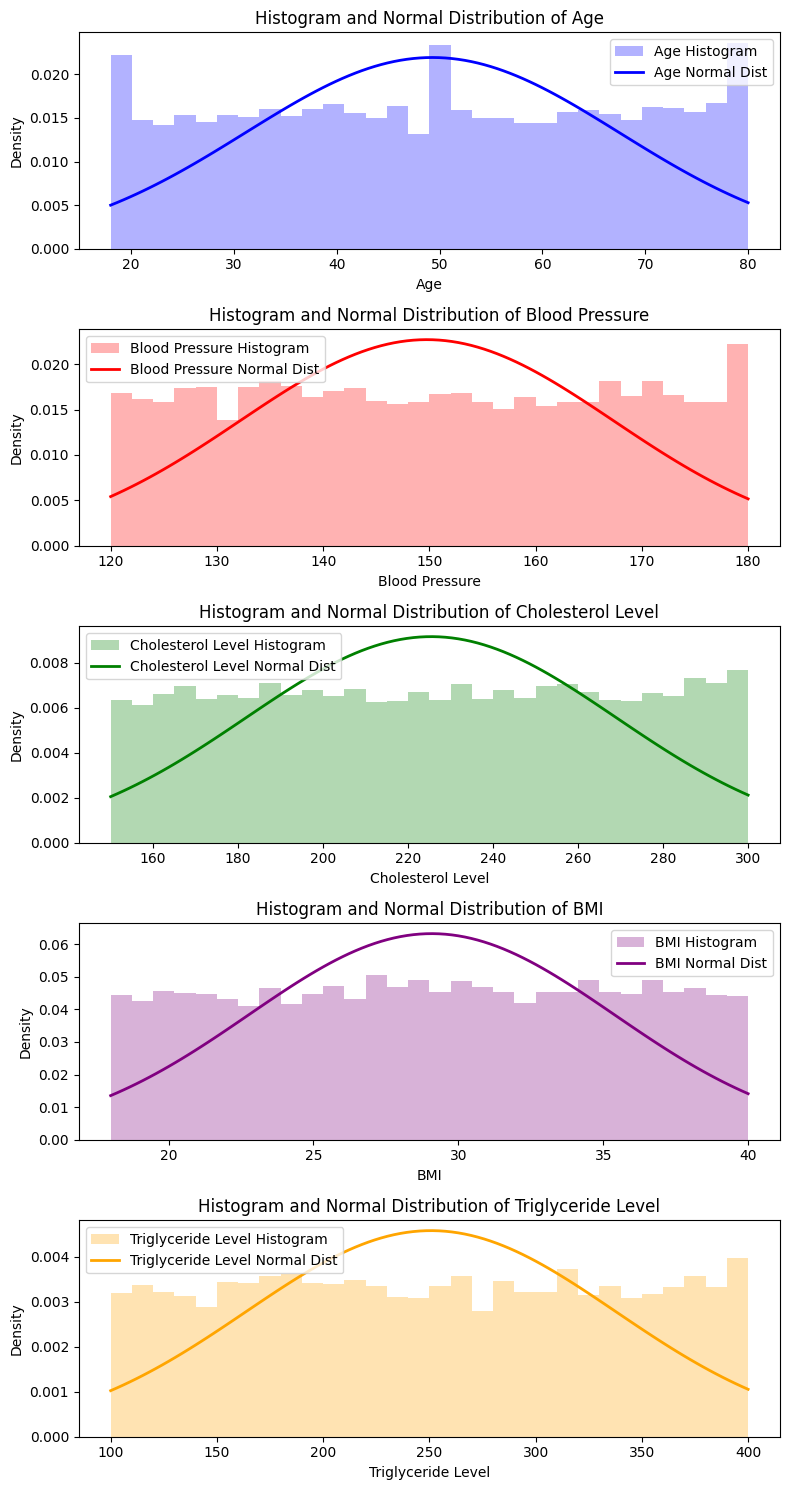

In [7]:
# Define variables to analyze
variables = ['Age', 'Blood Pressure', 'Cholesterol Level', 'BMI', 'Triglyceride Level']
colors = ['blue', 'red', 'green', 'purple', 'orange']

fig, axes = plt.subplots(len(variables), 1, figsize=(8, 15))

for i, var in enumerate(variables):
    data = df[var]
    mean = np.mean(data)
    std_dev = np.std(data)
    
    # Generate x values for normal distribution
    x_values = np.linspace(min(data), max(data), 100)
    y_values = norm.pdf(x_values, mean, std_dev)
    
    # Plot histogram
    axes[i].hist(data, bins=30, density=True, alpha=0.3, color=colors[i], label=f'{var} Histogram')
    
    # Plot normal distribution curve
    axes[i].plot(x_values, y_values, color=colors[i], linewidth=2, label=f'{var} Normal Dist')
    
    axes[i].set_xlabel(var)
    axes[i].set_ylabel("Density")
    axes[i].set_title(f"Histogram and Normal Distribution of {var}")
    axes[i].legend()

plt.tight_layout()
plt.show()

#### Findings
1. Age Distribution
    - The distribution appears fairly spread out, with a peak around middle-aged individuals.
    - The fitted normal curve shows that Age data follows a roughly normal distribution, but with some variations.

2. Blood Pressure Distribution
    - The Blood Pressure values are spread between approximately 120 and 180.
    - The fitted normal curve follows the histogram shape but may indicate some skewness in the data.

3. Cholesterol Level Distribution
    - The histogram appears relatively uniform, suggesting a broad spread of cholesterol values.
    - The normal distribution curve peaks around 220-250, indicating that most cholesterol levels fall within this range.

4. BMI Distribution
    - The normal distribution curve (purple) follows a bell-shaped trend, peaking around 25-30.
    - The distribution of BMI appears slightly more concentrated around the peak, meaning most individuals fall in the middle BMI range.

5. Triglyceride Level Distribution
    - The fitted normal distribution (yellow) peaks around 200-250.
    - The histogram shows a relatively even spread of triglyceride levels, with some variation.

### Scatter Plots

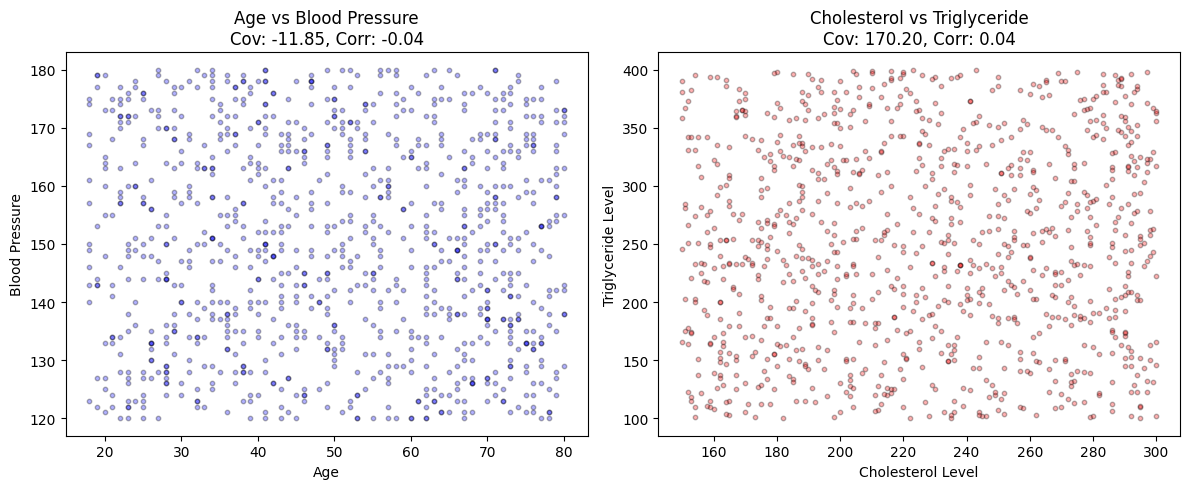

In [8]:
# Selecting variables and handling missing values
df_cleaned = df[['Age', 'Blood Pressure', 'Cholesterol Level', 'Triglyceride Level']].dropna()

# Reduce dataset size for better visualization (optional)
df_sample = df_cleaned.sample(n=1000, random_state=42) if len(df_cleaned) > 1000 else df_cleaned

# Define variables for scatter plots
age = df_sample['Age']
blood_pressure = df_sample['Blood Pressure']
cholesterol = df_sample['Cholesterol Level']
triglyceride = df_sample['Triglyceride Level']

# Compute covariance and Pearson correlation
cov_age_bp = np.cov(age, blood_pressure)[0, 1]
corr_age_bp = np.corrcoef(age, blood_pressure)[0, 1]

cov_chol_trig = np.cov(cholesterol, triglyceride)[0, 1]
corr_chol_trig = np.corrcoef(cholesterol, triglyceride)[0, 1]

# Plot scatter plots side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Scatter plot for Age vs Blood Pressure
axes[0].scatter(age, blood_pressure, color='blue', alpha=0.3, s=10, edgecolors='black')
axes[0].set_xlabel("Age")
axes[0].set_ylabel("Blood Pressure")
axes[0].set_title(f"Age vs Blood Pressure\nCov: {cov_age_bp:.2f}, Corr: {corr_age_bp:.2f}")

# Scatter plot for Cholesterol vs Triglyceride
axes[1].scatter(cholesterol, triglyceride, color='red', alpha=0.3, s=10, edgecolors='black')
axes[1].set_xlabel("Cholesterol Level")
axes[1].set_ylabel("Triglyceride Level")
axes[1].set_title(f"Cholesterol vs Triglyceride\nCov: {cov_chol_trig:.2f}, Corr: {corr_chol_trig:.2f}")

plt.tight_layout()
plt.show()

#### Findings

1. Age vs Blood Pressure
    - Covariance (-11.85): Slightly negative, but close to zero, suggesting no strong linear relationship.
    - Pearson Correlation (-0.04): Very weak negative correlation, indicating that age and blood pressure do not have a meaningful linear relationship.
    - Visual Analysis: The scatter plot appears widely spread without any clear trend. This suggests that age is not a strong predictor of blood pressure in this dataset.

2. Cholesterol vs Triglyceride (Right Plot)
    - Covariance (170.20): Positive, meaning as cholesterol levels increase, triglyceride levels also tend to increase slightly.
    - Pearson Correlation (0.04): Very weak positive correlation, suggesting almost no linear relationship.
    - Visual Analysis: The points are widely scattered, with no clear upward or downward trend. This suggests that cholesterol and triglyceride levels do not have a strong linear association.

### Hypothesis Testing

In [9]:
# Convert "Yes" and "No" to numerical values (Yes -> 1, No -> 0)
df['Heart_Disease'] = df['Heart Disease Status'].map({'Yes': 1, 'No': 0})
df = df.dropna(subset=['Age', 'Blood Pressure', 'Cholesterol Level', 'BMI', 'Triglyceride Level'])

# Define variables for testing
variables = ['Age', 'Blood Pressure', 'Cholesterol Level', 'BMI', 'Triglyceride Level']
group1 = df[df['Heart_Disease'] == 1]  # People with heart disease
group0 = df[df['Heart_Disease'] == 0]  # People without heart disease

# Conduct independent t-tests
results = {}
for var in variables:
    t_stat, p_value = stats.ttest_ind(group1[var], group0[var], equal_var=False)
    results[var] = {'T-statistic': t_stat, 'P-value': p_value}

# Convert results to DataFrame
results_df = pd.DataFrame(results).T
print("T-test results for heart disease comparison:\n", results_df)

T-test results for heart disease comparison:
                     T-statistic   P-value
Age                   -0.945479  0.344489
Blood Pressure        -1.330321  0.183512
Cholesterol Level      0.180808  0.856530
BMI                    1.910824  0.056121
Triglyceride Level     0.250103  0.802524


#### Findings

T-Test Results
- P-values for all variables are above 0.05, meaning none of them show statistically significant differences between the two groups.
- BMI has the lowest p-value (0.056), suggesting it is the most marginally different between groups, but still not significant at the conventional 0.05 level.
- Blood Pressure (p=0.18) and Age (p=0.34) also do not show strong evidence of differentiation between the two groups.
- Triglyceride Level (p=0.80) and Cholesterol Level (p=0.85) are far from significance, indicating no meaningful difference.

The t-test suggests that none of the individual variables significantly differentiate between people with and without heart disease.

### Logistic Regression

In [10]:
# Perform Logistic Regression
X = df[variables]  # Independent variables
y = df['Heart_Disease']  # Dependent variable (now 1 and 0)

# Add constant for intercept
X = sm.add_constant(X)

# Fit logistic regression model
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Print regression summary
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.500102
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:          Heart_Disease   No. Observations:                 9874
Model:                          Logit   Df Residuals:                     9868
Method:                           MLE   Df Model:                            5
Date:                Fri, 28 Feb 2025   Pseudo R-squ.:               0.0006561
Time:                        22:51:10   Log-Likelihood:                -4938.0
converged:                       True   LL-Null:                       -4941.3
Covariance Type:            nonrobust   LLR p-value:                    0.2619
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.2871      0.294     -4.372      0.000      -1.864      -0.710
Age  


Logistic Regression Results
- Pseudo R-squared: 0.0006561 
    - Indicates that the model explains very little of the variation in heart disease occurrence.
- LLR p-value: 0.2619 
    - Suggests that, overall, the model does not significantly improve prediction over a null model.